# 데이터 불러오기

In [15]:
import numpy as np
import pandas as pd
import os

# create a synthetic regression dataset of X, Y values.
from sklearn.datasets import make_regression
SyntheticX, SyntheticY = make_regression(n_samples=50, n_features=1, noise=10.0, random_state=17)

# create a synthetic binary classification dataset with 2 features.
from sklearn.datasets import make_classification
Synthetic_BinaryClassX, Synthetic_BinaryClassY = make_classification(n_samples=50, n_features=2, n_redundant=0, n_classes=2)

In [16]:
# iris dataset 불러오기
from sklearn.datasets import load_iris
iris_dataset = load_iris()
df_iris_features = pd.DataFrame(data = iris_dataset.data, columns=iris_dataset.feature_names) # 설명변수 (x)
df_iris_target = pd.DataFrame(data = iris_dataset.target, columns=['class']) # 목표변수 (y)

In [17]:
# scaler를 통해 정규화
from sklearn.preprocessing import MinMaxScaler

iris_scaler = MinMaxScaler()
iris_scaler.fit(df_iris_features)
nd_iris_features = iris_scaler.transform(df_iris_features)
df_iris_features_normalized = pd.DataFrame(data=nd_iris_features, columns=df_iris_features.columns)

# 훈련/검증 데이터 분리

In [24]:
# Scikit-Learn의 train_test_split 함수를 사용해서 train, test 데이터를 분리
from sklearn.model_selection import train_test_split

# iris dataset 나누기
# 정규화된 Feature들로 데이터셋 넣기
iris_split = train_test_split(df_iris_features_normalized, df_iris_target, test_size=0.25, random_state=17)

df_iris_features_train = iris_split[0] # train 설명변수
df_iris_features_test = iris_split[1] # test 설명변수
df_iris_target_train = iris_split[2] # train 목표변수
df_iris_target_test = iris_split[3] # test 목표변수

# Multinomial Logistic Regression
- Iris 데이터셋에 OneVsRestClassifier 클래스로 앙상블 이진 LogisticRegression 모델을 만들어 다중 분류기로 사용해보자

In [37]:
# OVA와 LogisticRegression으로 다중 분류기 구분
# 이진 분류 모델을 여러 개 학습시켜 다중 분류 모델을 만드는 방법
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression(penalty='l2', fit_intercept=True, solver='liblinear')
ovr_logit_model = OneVsRestClassifier(logit_model)

ovr_logit_model.fit(df_iris_features_train, df_iris_target_train.values.ravel())

# 0.5 임계값으로 테스트 데이터셋에 예측 수행
ovr_logit_predictions = ovr_logit_model.predict(df_iris_features_test)

In [38]:
# 예측을 수행한 결과는 0,1,2 중 하나
print (ovr_logit_predictions)

[0 2 2 1 2 2 2 2 1 2 2 0 1 0 2 0 0 2 2 2 2 0 2 1 2 2 1 1 0 1 0 1 0 0 1 2 1
 2]


In [39]:
# 0, 1, 2 => 3개의 값이 될 확률 (범주별 확률)
ovr_logit_probs = ovr_logit_model.predict_proba(df_iris_features_test)
print(ovr_logit_probs)

[[0.82272514 0.12785864 0.04941622]
 [0.12044579 0.40056122 0.47899299]
 [0.02542865 0.32329645 0.6512749 ]
 [0.18305903 0.42111625 0.39582472]
 [0.05944138 0.38763397 0.55292465]
 [0.07236737 0.36312485 0.56450777]
 [0.16344427 0.37963956 0.45691617]
 [0.01998424 0.24601841 0.73399734]
 [0.18950936 0.48395363 0.32653701]
 [0.03663432 0.40209894 0.56126674]
 [0.02062532 0.27783051 0.70154417]
 [0.73577162 0.22066942 0.04355896]
 [0.15270279 0.42746281 0.41983439]
 [0.77216659 0.18251154 0.04532187]
 [0.05309898 0.32231709 0.62458393]
 [0.815817   0.13825926 0.04592374]
 [0.73489217 0.22191513 0.0431927 ]
 [0.04491288 0.36458749 0.59049964]
 [0.02065056 0.27871118 0.70063826]
 [0.02127991 0.35388486 0.62483523]
 [0.07152985 0.41695375 0.5115164 ]
 [0.7706894  0.18349734 0.04581325]
 [0.07040028 0.36307885 0.56652087]
 [0.19267192 0.4727485  0.33457958]
 [0.15280003 0.38212573 0.46507424]
 [0.17395557 0.31901921 0.50702523]
 [0.12736739 0.48820204 0.38443056]
 [0.13568065 0.44198711 0.42

In [40]:
# 로지스틱 회귀의 경우 내부적으로 선형회귀 모델을 학습할 때, 시그모이드 함수 대신 소프트맥스 함수를 사용해 다중 분류 모델기를 생성할 수 있음
# 소프트맥스 함수는 여러 선형회귀 모델로부터 입력을 받아 범주별 확률을 출력할 수 있음
from sklearn.linear_model import LogisticRegression

softmax_logit_model = LogisticRegression(penalty='l2', fit_intercept=True, solver='lbfgs', multi_class='multinomial')
softmax_logit_model.fit(df_iris_features_train, df_iris_target_train.values.ravel())

# 테스트 데이터셋에 예측 수행
softmax_logit_predictions = softmax_logit_model.predict(df_iris_features_test)

In [41]:
# 예측을 수행한 결과는 0,1,2 중 하나
print(softmax_logit_predictions)

[0 1 2 1 2 2 1 2 1 2 2 0 1 0 2 0 0 2 2 2 1 0 2 1 1 2 1 1 0 1 0 1 0 0 1 1 1
 2]


In [42]:
# 0, 1, 2 => 3개의 값이 될 확률 (범주별 확률)
softmax_logit_probs = softmax_logit_model.predict_proba(df_iris_features_test)
print(softmax_logit_probs)

[[0.89582633 0.09444564 0.00972803]
 [0.09889138 0.50828121 0.39282741]
 [0.01311439 0.23998685 0.74689876]
 [0.1645445  0.56290434 0.27255115]
 [0.04525701 0.42873174 0.52601125]
 [0.05219811 0.40090084 0.54690105]
 [0.1412285  0.49318467 0.36558684]
 [0.00512255 0.1226479  0.87222954]
 [0.18517246 0.6381944  0.17663314]
 [0.0301524  0.40920296 0.56064464]
 [0.00767857 0.15588852 0.83643291]
 [0.85228205 0.14095824 0.00675971]
 [0.1344201  0.56001268 0.30556722]
 [0.87716333 0.11550045 0.00733622]
 [0.03095013 0.30494959 0.66410028]
 [0.89925442 0.09260716 0.00813842]
 [0.86906457 0.12521241 0.00572302]
 [0.0286017  0.35588746 0.61551083]
 [0.00777372 0.15176958 0.84045669]
 [0.01219112 0.26741715 0.72039173]
 [0.05557848 0.49114599 0.45327553]
 [0.86733298 0.12475638 0.00791064]
 [0.05107527 0.39427714 0.55464759]
 [0.18367433 0.62661521 0.18971046]
 [0.1288656  0.49409071 0.37704369]
 [0.12588161 0.41550633 0.45861205]
 [0.12692498 0.64014023 0.23293479]
 [0.11348037 0.57595155 0.31

# decision tree models (의사 결정 나무)
- 부모 노드가 의사 결정 경계를 나타내고 자식 노드가 의사 결정 결과를 나타내는 나무 구조
- 의사 결정 나무는 분류 및 회귀 문제 모두에 적용 가능

In [32]:
# 의사 결정 나무 기반 다중 분류 모델 구현
from sklearn.tree import DecisionTreeClassifier

dtree_model = DecisionTreeClassifier(max_depth=4)
dtree_model.fit(df_iris_features_train, df_iris_target_train.values.ravel())

# 테스트 데이터셋에 예측 수행
dtree_predictions = dtree_model.predict(df_iris_features_test)

In [34]:
# 예측을 수행한 결과는 0,1,2 중 하나
print (dtree_predictions)

[0 1 2 1 2 2 1 2 1 2 2 0 1 0 2 0 0 2 2 2 1 0 2 1 1 1 1 1 0 1 0 1 0 0 1 1 1
 2]


In [36]:
#  0, 1, 2 =>3개의 값이 될 확률 
dtree_probs = dtree_model.predict_proba(df_iris_features_test)
print(dtree_probs)

[[1.         0.         0.        ]
 [0.         0.97058824 0.02941176]
 [0.         0.         1.        ]
 [0.         0.97058824 0.02941176]
 [0.         0.         1.        ]
 [0.         0.         1.        ]
 [0.         0.97058824 0.02941176]
 [0.         0.         1.        ]
 [0.         0.97058824 0.02941176]
 [0.         0.         1.        ]
 [0.         0.         1.        ]
 [1.         0.         0.        ]
 [0.         0.97058824 0.02941176]
 [1.         0.         0.        ]
 [0.         0.         1.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         0.         1.        ]
 [0.         0.         1.        ]
 [0.         0.         1.        ]
 [0.         0.97058824 0.02941176]
 [1.         0.         0.        ]
 [0.         0.         1.        ]
 [0.         0.97058824 0.02941176]
 [0.         0.97058824 0.02941176]
 [0.         0.97058824 0.02941176]
 [0.         0.97058824 0.02941176]
 [0.         0.97058824 0.02

# 모델 평가

In [49]:
# softmax (a.k.a 다중회귀) 분류기
from sklearn.linear_model import LogisticRegression
softmax_logit_model = LogisticRegression(penalty='l2', fit_intercept=True, solver='lbfgs', multi_class='multinomial')
softmax_logit_model.fit(df_iris_features_train, df_iris_target_train.values.ravel())

# 의사 결정 나무 기반 다중 분류기
from sklearn.tree import DecisionTreeClassifier
mc_dtree_model = DecisionTreeClassifier(max_depth=4)
mc_dtree_model.fit(df_iris_features_train, df_iris_target_train.values.ravel())

# 테스테 셋에 예측 수행
softmax_logit_predictions = softmax_logit_model.predict(df_iris_features_test)
mc_predictions = mc_dtree_model.predict(df_iris_features_test)

# 혼동 행렬 생성
from sklearn.metrics import confusion_matrix

cm_softmax = confusion_matrix(df_iris_target_test.values.ravel(), softmax_logit_predictions)
cm_mc_dtree = confusion_matrix(df_iris_target_test.values.ravel(), mc_predictions)

In [50]:
print(cm_softmax)

[[10  0  0]
 [ 0 14  1]
 [ 0  1 12]]


In [51]:
print(cm_mc_dtree)

[[10  0  0]
 [ 0 15  0]
 [ 0  1 12]]


In [52]:
# 혼동 행렬을 열 지도로 표현
%matplotlib inline
import matplotlib.pyplot as plt

# Matplotlib 함수로 혼동 행렬을 열 지도로 나타내기
def plot_confusion_matrix(cmatrix, class_labels, axes, title, cmap):

    heatmap_image = axes.imshow(cmatrix, interpolation='nearest', cmap=cmap)
    axes.figure.colorbar(heatmap_image, ax=axes)
    
    num_rows = cmatrix.shape[0]
    num_cols = cmatrix.shape[1]
    
    axes.set_title(title)
    axes.set_xlabel('Predicted')
    axes.set_ylabel('True')
    
    axes.set_xticks(np.arange(num_cols))
    axes.set_yticks(np.arange(num_rows))
    axes.set_xticklabels(class_labels)
    axes.set_yticklabels(class_labels)
    
    # Loop 돌면서 주석 장성
    #fmt = '.2f' if normalize else 'd'
    thresh = cmatrix.max() / 2.
    for y in range(num_rows):
        for x in range(num_cols):
            axes.text(x, y, format(cmatrix[y, x], '.0f'),
                    ha="center", va="center",
                    color="white" if cmatrix[y, x] > thresh else "black")


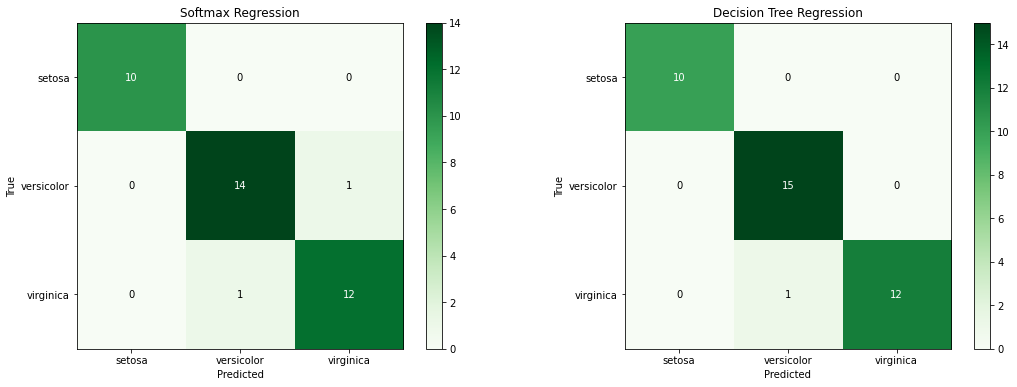

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))

plot_confusion_matrix(cm_softmax, 
                      iris_dataset.target_names, axes[0], 
                      "Softmax Regression", 
                      plt.cm.Greens)

plot_confusion_matrix(cm_mc_dtree, 
                      iris_dataset.target_names, axes[1], 
                      "Decision Tree Regression", 
                      plt.cm.Greens)

# Grid search를 사용해 가장 성능이 좋은 파라미터 선택

In [74]:
# GridSearchCV를 통해 의사결정나무 기반 모델이 최고의 정확도를 보이는 파라미터 차지
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

estimator_Df =DecisionTreeClassifier()

grid_params = {  
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    }

grid_search = GridSearchCV(estimator=estimator_Df,  
                           param_grid=grid_params, scoring='accuracy',
                           cv=5, n_jobs=-1)

grid_search.fit(df_iris_features_train, df_iris_target_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [75]:
best_parameters = grid_search.best_params_  
print(best_parameters)  

{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2, 'splitter': 'random'}


In [76]:
best_accuracy = grid_search.best_score_  
print(best_accuracy)  

0.9648221343873518


In [81]:
# 가장 성능이 좋은 모델
best_model = grid_search.best_estimator_

In [82]:
y_test_pred =best_model.predict(df_iris_features_test)

In [83]:
# 모델 평가
from sklearn.metrics import classification_report

In [85]:
print(classification_report(df_iris_target_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.68      1.00      0.81        15
           2       1.00      0.46      0.63        13

    accuracy                           0.82        38
   macro avg       0.89      0.82      0.81        38
weighted avg       0.87      0.82      0.80        38



In [ ]:
print('Done')